# Библиотеки 


Ячейки лучше выполнять каждую самому (есть баг, что не выполняются некоторые функции, если выполнять ячейки автоматически.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
import ipywidgets as widg

from IPython.display import display
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip

from sklearn.decomposition import PCA

# Загрузка данных

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)

names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
data.columns = names

data = data.drop(columns='ID')

data['Class'].replace(
                      {
                          1:'building_windows_float_processed',
                          2:'building_windows_non_float_processed',
                          3:'vehicle_windows_float_processed',
                          4:'vehicle_windows_non_float_processed',
                          5:'containers',
                          6:'tableware',
                          7:'headlamps'
                      }, inplace = True)

# Задание 2. Формы и виджеты при разработке GUI в Jupyter Notebook

## 1. Форма выбора и представления датафрема

In [ ]:
#@title {run: "auto"}
data1 = pd.read_csv("/content/sample_data/california_housing_test.csv")
data2 = pd.read_csv("/content/sample_data/california_housing_train.csv")
data3 = pd.read_csv("/content/sample_data/mnist_test.csv")

format = True #@param {type: "boolean"}

tabl = "data2" #@param ["data1", "data2", "data3"]


if format == False and tabl == 'data1':
    print(data1)
if format == False and tabl == 'data2':
    print(data2)
if format == False and tabl == 'data3':
    print(data3)
else:
    if format == True and tabl == 'data1':
      print(data1.describe())
    if format == True and tabl == 'data2':
      print(data2.describe())
    if format == True and tabl == 'data3':
      print(data3.describe())

          longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean    -119.562108     35.625225  ...       3.883578       207300.912353
std        2.005166      2.137340  ...       1.908157       115983.764387
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.790000     33.930000  ...       2.566375       119400.000000
50%     -118.490000     34.250000  ...       3.544600       180400.000000
75%     -118.000000     37.720000  ...       4.767000       265000.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]


## 2. Виджет button для вывода информации или описательной статистики датафрейма

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as wd
from IPython.display import display as dp

data = pd.read_csv("/content/sample_data/california_housing_test.csv")

button = wd.Button(description="Info")
output = wd.Output()

def  on_my_button_click(b):
    with output:
        print('Информация:')
        print(data.info())
        print('\n')
button.on_click(on_my_button_click)
display(button, output)

button = wd.Button(description="Describe")
output = wd.Output()

def  on_my_button_click(b):
    with output:
        print('Описание:')
        print(data.describe())
        print('\n')
button.on_click(on_my_button_click)
display(button, output)

Button(description='Info', style=ButtonStyle())

Output()

Button(description='Describe', style=ButtonStyle())

Output()

# Задание 3. Визуальный анализ данных

## Cделать виджет для выбора переменной. Для выбранной переменной строиться гистограмма, если переменная числовая или столбчатая диаграмма, если переменная категориальная.

In [ ]:
import ipywidgets

def histogram (name):

  if name == "Class":
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(data['Class'].value_counts().index.values,
    data['Class'].value_counts().values)
    ax.set_xlabel(None, fontsize = 16)
    ax.set_title('Barplot для ' + str(name), fontsize=16)
    ax.tick_params(axis='x', which = 'major', labelsize = 14, rotation = 35)
    plt.show()

  else:
      sns.histplot(data=data, x = name,
                        bins = 20,
                        kde = True,
                        stat = 'probability' )
      plt.show()


ipywidgets.interact(histogram, name= ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'])

interactive(children=(Dropdown(description='name', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe…

<function __main__.histogram>

## 2. Cделать виджет для выбора переменной. Для выбранной переменной строиться диаграмма "ящик с усами".

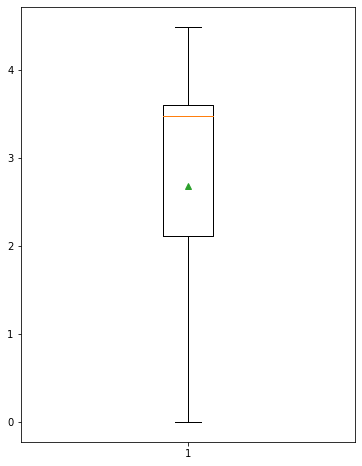

In [ ]:
#@title {run: "auto"}
Column_Name = "Mg" #@param ["Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 

fig3, ax3 = plt.subplots(figsize = (6, 8))

ax3.boxplot(data[str(Column_Name)][~np.isnan(data[str(Column_Name)])], showmeans=True)

plt.show()

## 3. Сделать виджет для выбора пары переменных, для них строится парный график с раскраской точек по классам.

In [ ]:
#@title {run: "auto"}
Variable1 = "Si" #@param ["Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 
Variable2 = "Ba" #@param ["Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 

pairButton = widg.Button(description="Show Pair Plot")
pairOutput = widg.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with pairOutput:
    fig, ax = plt.subplots(figsize = (10, 8))

    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[Variable1][data['Class'] == glassType],
                data[Variable2][data['Class'] == glassType],
                label = glassType)

    # ax.scatter(data['Mg'], data['Fe'])
    ax.set_xlabel(Variable1)
    ax.set_ylabel(Variable2)
    ax.legend()

    plt.show()

pairButton.on_click(on_button_clicked)
display(pairButton, pairOutput)

# Задание 4. Заполнение пробелов, корреляции
1. Заполнить пропуски в данных 2м способом - средним по категориям (по типам стекла). Сохранить в новый датафрейм, построить графики МГК (сравнить с предыдущими)
2. Построить графики heatmap для средних и слабых корреляций

In [ ]:
data.mean()
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()
pcaData=pd.DataFrame(
    pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']]))
pcaNames=[]
for i in range(9):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.431425,-1.102115,-1.066958,-0.158237,0.143080,-0.081096,-0.067756,0.011377,-0.000945
1,-1.436707,0.343585,-0.277824,-0.293937,-0.194434,-0.050149,-0.043168,-0.017048,-0.000955
2,-1.427322,0.345720,0.138708,-0.321984,0.023720,-0.189375,-0.045462,0.019612,-0.000351
3,-1.257825,-0.249060,0.057742,0.022271,0.002472,0.016129,-0.046219,0.087868,-0.000471
4,-1.312466,-0.018405,0.357510,-0.278564,-0.071025,0.084925,-0.054818,-0.001803,-0.000694


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit( data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_*100)

[4.76205247e+01 2.63192760e+01 1.07800432e+01 1.02024637e+01
 3.30672372e+00 1.60477360e+00 1.42743130e-01 2.34365001e-02
 1.53917702e-05]


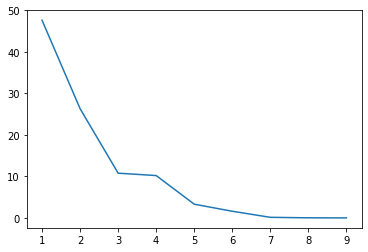

In [ ]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
pcaData['Class'] = data_fillna_mean['Class'].copy()

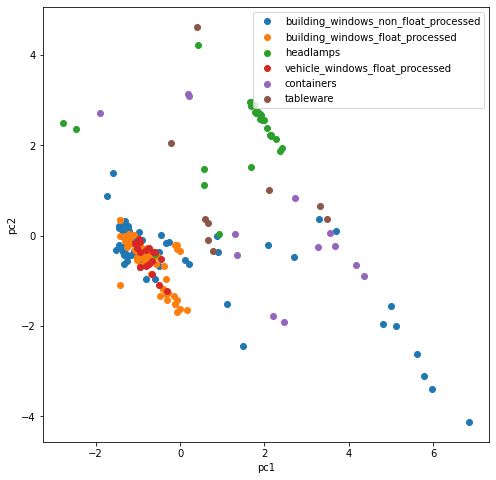

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['Class']==glassType ],
             pcaData[col2][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

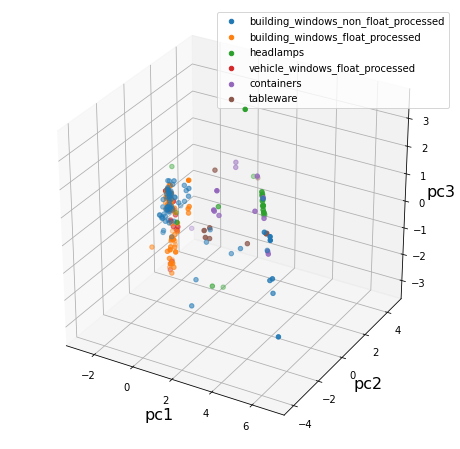

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['Class']==glassType ], 
             pcaData['pc2'][ pcaData['Class']==glassType ], 
             pcaData['pc3'][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

In [ ]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


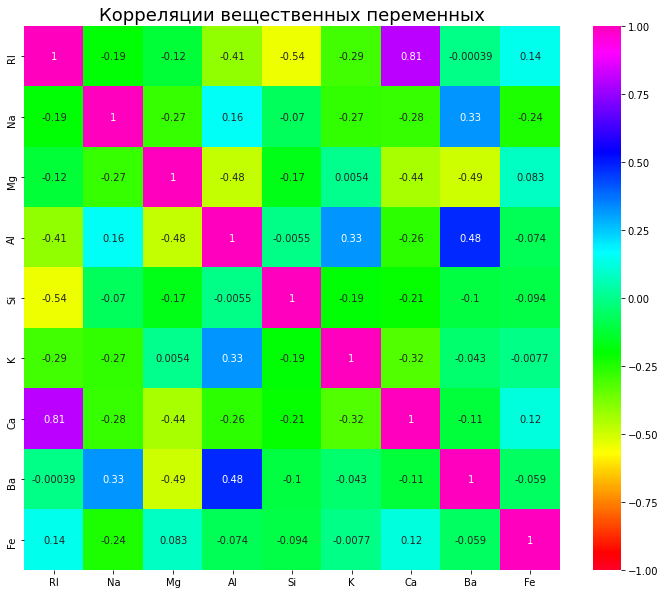

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

<function matplotlib.pyplot.show>

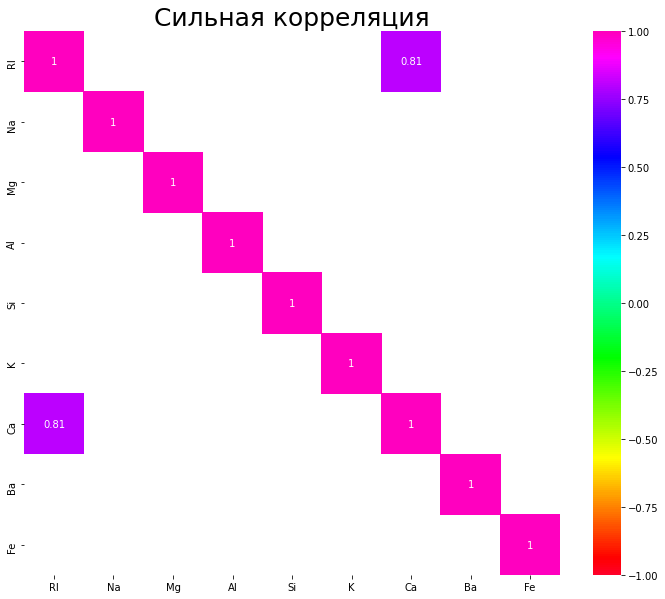

In [ ]:
plt.figure (figsize=(12,10))
ax = sns.heatmap (corr[(corr >= 0.75)|(corr <=-0.75)], annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Сильная корреляция', fontsize=25)
plt.show

<function matplotlib.pyplot.show>

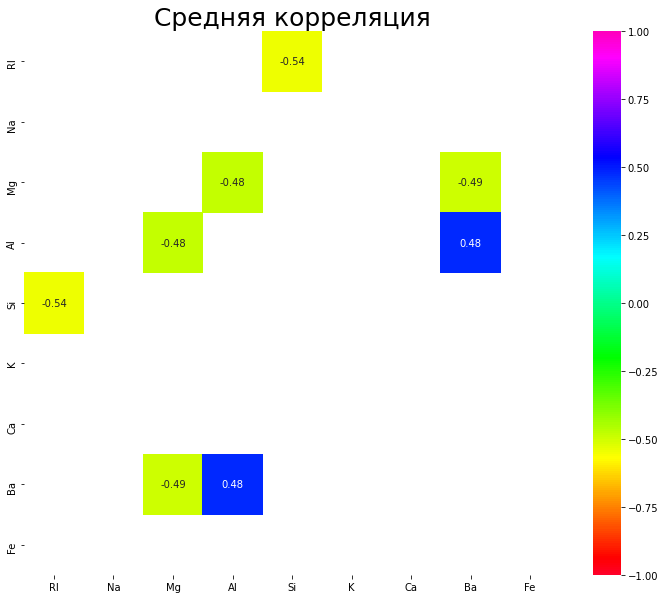

In [ ]:
plt.figure (figsize=(12,10))
ax = sns.heatmap (corr[(corr<=0.75)&(corr>=0.45)|(corr<=-0.45)&(corr>=-0.75)], annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Средняя корреляция', fontsize=25)
plt.show

In [ ]:
plt.figure (figsize=(12,10))
ax = sns.heatmap (corr[(corr<=0.45)&(corr>=0.25)|(corr<=-0.25)&(corr>=-0.45)], annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Слабая корреляция', fontsize=25)
plt.show